In [14]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils

%matplotlib inline

In [2]:
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
X_train /= 255
X_test /= 255

In [8]:
X_train = np.expand_dims(X_train, -1)
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_test = np.expand_dims(X_test, -1)
X_test.shape

(10000, 28, 28, 1)

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [11]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [12]:
from keras.layers.convolutional import MaxPooling2D

In [13]:
from keras.layers.convolutional import Conv2D

In [14]:
model = Sequential()

1층 

In [15]:
model.add(Conv2D(
    20, kernel_size=5, padding='same', input_shape=(28, 28, 1),
    activation='relu'
))

In [16]:
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

2층

In [17]:
model.add(Conv2D(
    50, kernel_size=5, padding='same', activation='relu'))

In [18]:
model.add(MaxPooling2D(pool_size=(2,2)))

출력 준비층

In [19]:
from keras.layers.core import Flatten

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(500, activation='relu'))

출력층

In [22]:
model.add(Dense(10, activation='softmax'))

In [23]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    X_train, Y_train, batch_size=128, epochs=20, 
    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 20s 421us/step - loss: 0.1753 - acc: 0.9466 - val_loss: 0.0662 - val_acc: 0.9810
Epoch 2/20
48000/48000 [==============================] - 20s 408us/step - loss: 0.0479 - acc: 0.9848 - val_loss: 0.0425 - val_acc: 0.9873
Epoch 3/20
48000/48000 [==============================] - 19s 405us/step - loss: 0.0324 - acc: 0.9899 - val_loss: 0.0385 - val_acc: 0.9884
Epoch 4/20
48000/48000 [==============================] - 20s 407us/step - loss: 0.0240 - acc: 0.9923 - val_loss: 0.0341 - val_acc: 0.9897
Epoch 5/20
48000/48000 [==============================] - 20s 408us/step - loss: 0.0179 - acc: 0.9941 - val_loss: 0.0368 - val_acc: 0.9887
Epoch 6/20
48000/48000 [==============================] - 19s 404us/step - loss: 0.0136 - acc: 0.9956 - val_loss: 0.0455 - val_acc: 0.9867
Epoch 7/20
48000/48000 [==============================] - 19s 405us/step - loss: 0.0116 - acc: 0.9964 - val_loss: 0.

In [25]:
train_results = DataFrame(history.history)

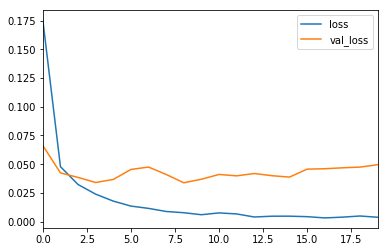

In [26]:
train_results[['loss', 'val_loss']].plot()

In [27]:
score = model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 132us/step


In [28]:
print('Loss: {0}, Acc.: {1}'.format(*score))

Loss: 0.041781780859883134, Acc.: 0.9903


# CIFAR-10

In [29]:
from keras.datasets import cifar10

In [30]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 33s 0us/step


In [31]:
X_train.shape

(50000, 32, 32, 3)

In [32]:
X_test.shape

(10000, 32, 32, 3)

In [33]:
x = X_train[0]

In [34]:
from scipy.misc import imsave

In [35]:
imsave('cifar10-sample.png', x)

In [36]:
y_train[0]

array([6], dtype=uint8)

In [37]:
import pickle

In [39]:
경로 = r'/home/wooyang/.keras/datasets/cifar-10-batches-py/batches.meta'
with open(경로, 'rb') as file:
    cifar10_meta = pickle.load(file)

In [40]:
cifar10_labels = cifar10_meta['label_names']

In [41]:
cifar10_labels[6]

'frog'

In [42]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [43]:
X_train.shape

(50000, 32, 32, 3)

In [44]:
X_train /= 255
X_test /= 255

In [45]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [46]:
from keras.layers.core import Dropout

In [47]:
model = Sequential()

In [48]:
model.add(Conv2D(
    32, kernel_size=3, padding='same', 
    input_shape=(32, 32, 3), activation='relu'))

In [49]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [50]:
model.add(Dropout(0.25))

In [51]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))

In [52]:
model.add(Dropout(0.5))

In [53]:
model.add(Dense(10, activation='softmax'))

In [54]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [55]:
history = model.fit(
    X_train, Y_train, batch_size=128, epochs=10,
    validation_split=0.2
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 28s 711us/step - loss: 1.7388 - acc: 0.3757 - val_loss: 1.4173 - val_acc: 0.5052
Epoch 2/10
40000/40000 [==============================] - 28s 697us/step - loss: 1.3869 - acc: 0.5041 - val_loss: 1.2625 - val_acc: 0.5685
Epoch 3/10
40000/40000 [==============================] - 28s 697us/step - loss: 1.2783 - acc: 0.5451 - val_loss: 1.1901 - val_acc: 0.5871
Epoch 4/10
40000/40000 [==============================] - 28s 698us/step - loss: 1.2000 - acc: 0.5752 - val_loss: 1.1613 - val_acc: 0.5932
Epoch 5/10
40000/40000 [==============================] - 28s 697us/step - loss: 1.1466 - acc: 0.5958 - val_loss: 1.0914 - val_acc: 0.6170
Epoch 6/10
40000/40000 [==============================] - 28s 697us/step - loss: 1.0896 - acc: 0.6112 - val_loss: 1.0740 - val_acc: 0.6293
Epoch 7/10
40000/40000 [==============================] - 28s 699us/step - loss: 1.0492 - acc: 0.6287 - val_loss: 1.

In [56]:
train_results = DataFrame(history.history)

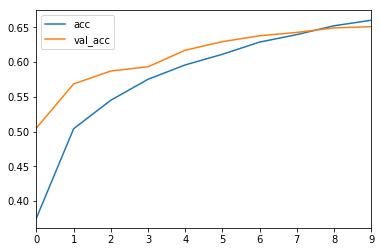

In [57]:
train_results[['acc', 'val_acc']].plot()

보다 깊은 층을 구성해 성능 개선

conv+conv+maxpool+dropout+conv+conv+maxpool+dropout  
dense+dropout+dense

In [58]:
model = Sequential()

In [59]:
model.add(Conv2D(
    32, kernel_size=3, padding='same', activation='relu',
    input_shape=(32, 32, 3)
))

In [60]:
model.add(Conv2D(
    32, kernel_size=3, padding='same', activation='relu'))

In [61]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [62]:
model.add(Dropout(0.25))

In [63]:
model.add(Conv2D(
    64, kernel_size=3, padding='same', activation='relu'))

In [64]:
model.add(Conv2D(
    64, kernel_size=3, padding='same', activation='relu'))

In [65]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [66]:
model.add(Dropout(0.25))

In [67]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

In [68]:
model.add(Dense(10, activation='softmax'))

In [69]:
model.compile(
    loss='categorical_crossentropy', optimizer='rmsprop',
    metrics=['accuracy']
)

In [70]:
history = model.fit(
    X_train, Y_train, batch_size=128, epochs=10,
    validation_split=0.2
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 58s 1ms/step - loss: 1.8256 - acc: 0.3436 - val_loss: 1.5204 - val_acc: 0.4501
Epoch 2/10
40000/40000 [==============================] - 58s 1ms/step - loss: 1.3379 - acc: 0.5217 - val_loss: 1.1786 - val_acc: 0.5855
Epoch 3/10
40000/40000 [==============================] - 58s 1ms/step - loss: 1.1183 - acc: 0.6053 - val_loss: 1.1585 - val_acc: 0.5846
Epoch 4/10
40000/40000 [==============================] - 58s 1ms/step - loss: 0.9766 - acc: 0.6579 - val_loss: 0.9132 - val_acc: 0.6748
Epoch 5/10
40000/40000 [==============================] - 58s 1ms/step - loss: 0.8777 - acc: 0.6921 - val_loss: 0.9241 - val_acc: 0.6792
Epoch 6/10
40000/40000 [==============================] - 58s 1ms/step - loss: 0.8036 - acc: 0.7211 - val_loss: 0.7907 - val_acc: 0.7267
Epoch 7/10
40000/40000 [==============================] - 58s 1ms/step - loss: 0.7434 - acc: 0.7427 - val_loss: 0.7742 - val_acc

In [71]:
train_results = DataFrame(history.history)

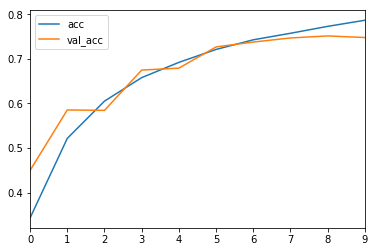

In [72]:
train_results[['acc', 'val_acc']].plot()

In [73]:
score = model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 3s 319us/step


In [74]:
print('Loss: {0}, Acc.: {1}'.format(*score))

Loss: 0.8017212121009827, Acc.: 0.746


In [9]:
from scipy.misc import imread, imsave, imresize

In [10]:
모찌 =  imread('data/mozzi.jpg')

In [77]:
type(모찌)

numpy.ndarray

In [78]:
모찌.shape

(640, 640, 3)

In [79]:
x = imresize(모찌, (32, 32, 3))

In [80]:
x.shape

(32, 32, 3)

In [81]:
imsave('mozzi_32x32.png', x)

In [82]:
X_test.shape

(10000, 32, 32, 3)

In [83]:
X = np.array([x])

In [84]:
X.shape

(1, 32, 32, 3)

In [85]:
model.predict(X)

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]], dtype=float32)

In [86]:
model.predict_classes(X)

array([5])

In [87]:
cifar10_labels[5]

'dog'

# 데이터 보강 

Data Augmentation

In [88]:
from keras.preprocessing.image import ImageDataGenerator

In [89]:
생성기 = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [90]:
import os

In [91]:
if not os.path.exists('preview'):
    os.makedirs('preview')

In [92]:
import itertools

In [93]:
X = np.array([모찌])

In [94]:
flow = 생성기.flow(
    X, batch_size=1, save_to_dir='preview',
    save_prefix='mozzi', save_format='png'
)

In [95]:
for batch in itertools.islice(flow, 0, 20):
    pass

# Keras Application

In [4]:
from keras.applications.vgg16 import VGG16, preprocess_input

In [5]:
model = VGG16(weights=None)

In [6]:
model.load_weights('data/keras/vgg16_weights_tf_dim_ordering_tf_kernels.h5')

In [11]:
x = imresize(모찌, (224, 224, 3))

/home/wooyang/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/home/wooyang/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [12]:
x = x.astype('float32')

In [15]:
X = np.array([x])

In [16]:
X = preprocess_input(X)

In [17]:
y_pred = model.predict(X)

[텍스트 라벨](https://gist.github.com/lseongjoo/9682a6f832cae710fb836544ffb84373)

In [18]:
y_pred.argmax()

153

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [106]:
model.save('vgg16-imagenet.h5')

In [107]:
model.save_weights('vgg16-imagenet-weights.h5')

In [1]:
from keras.models import load_model

/home/wooyang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/wooyang/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
del model

NameError: name 'model' is not defined

In [3]:
model = load_model('vgg16-imagenet.h5')

/home/wooyang/anaconda3/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [111]:
y_pred = model.predict(X)

In [112]:
y_pred[0].max()

0.837861

In [113]:
y_pred.argmax()

153